In [3]:
pip install opencv-python

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 8, Finished, Available)

     |████████████████████████████████| 62.2 MB 19.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 9, Finished, Available)

In [7]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 12, Finished, Available)

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
new_model = keras.models.load_model("Users/vkoduru/Data Mining Project/digit_predict.h5")

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 10, Finished, Available)

2024-05-07 03:42:22.194995: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
import seaborn as sn

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 14, Finished, Available)

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 15, Finished, Available)

Text(69.0, 0.5, 'Truth')

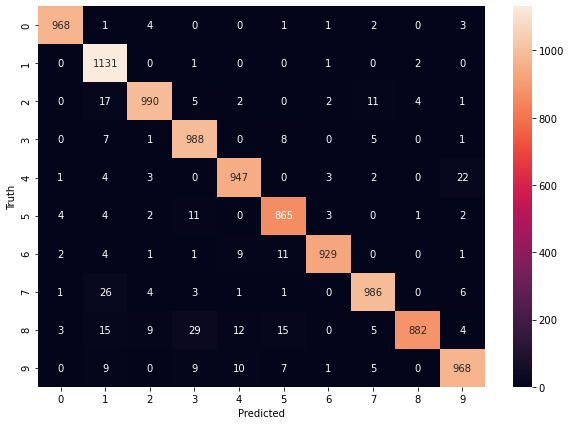

In [10]:
y_predicted = new_model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

StatementMeta(d424dced-cac4-4c8b-ad5c-754a4b7d8773, 32, 17, Finished, Available)

The number is probably a 1


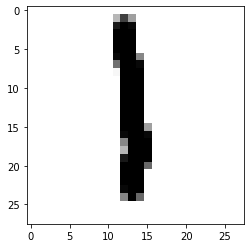

The number is probably a 2


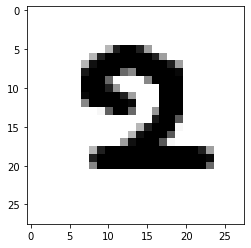

The number is probably a 3


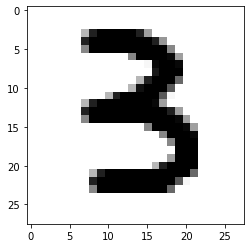

The number is probably a 4


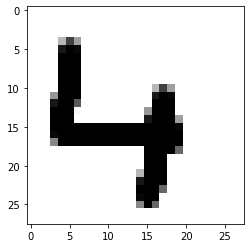

The number is probably a 5


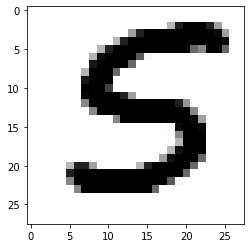

The number is probably a 6


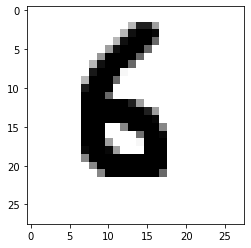

The number is probably a 7


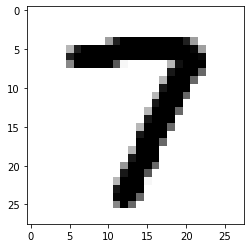

The number is probably a 8


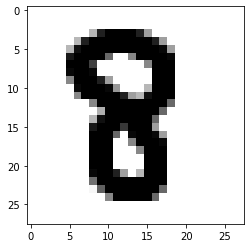

The number is probably a 1


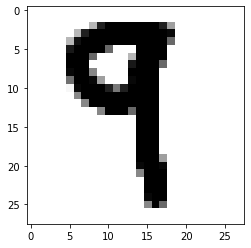

The number is probably a 0


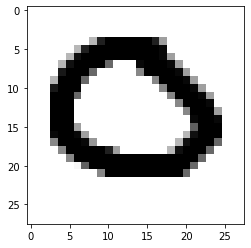

The number is probably a 6


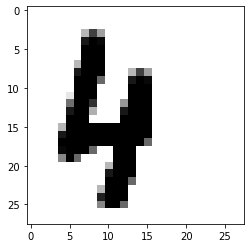

In [12]:
image_number = 1
while os.path.isfile('Users/vkoduru/digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('Users/vkoduru/digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = new_model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1